# KNN and Random Forest Example

In [1]:
import os
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
bc = pd.read_csv('breast_cancer_table.csv')

In [3]:
bc

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
bc = bc.drop(labels=["id",'Unnamed: 32'],axis=1) #drop our useless column

In [5]:
def makedummies(diagnosis):
    if str(diagnosis) == "M":
        return 1
    else:
        return 0

In [6]:
bc["diagnosis"] = bc["diagnosis"].apply(makedummies)

In [7]:
train,test = sk.model_selection.train_test_split(bc) #split our data

We then further split our data into two groups: the input and the output. The input is all of the parameters that we are using to guess the output.

In [8]:
Y_train = train['diagnosis'] #gets the diagnosis column, our output
Y_train = np.asarray(Y_train) #turns it into an array for feeding into algorithm
X_train = train.drop('diagnosis', 1) #gets the rest of the columns, our input
X_train = np.asarray(X_train) #turns it into an array

#same goes for the test
Y_test = test['diagnosis']
Y_test = np.asarray(Y_test)
X_test = test.drop('diagnosis', 1)
X_test = np.asarray(X_test)

In [9]:
rf = RandomForestClassifier(n_estimators = 25) #create classifier, define # of trees
rf.fit(X_train,Y_train) #fit our model
Y_pred_rf = rf.predict(X_test) #put the model to work
acc = accuracy_score(Y_pred_rf,Y_test) #create accuracy score
print("The accurracy of 25 trees is ",acc)

#we can try this with more or less trees to find which is most accurate

The accurracy of 25 trees is  0.9300699300699301


In [10]:
from sklearn.pipeline import Pipeline #for our knn model

In [11]:
scores = []
for neighbors in range(1,len(X_test)): #from one to max neighbors
    kpipe=Pipeline(steps=[ #creates model
            ("model",sk.neighbors.KNeighborsClassifier(neighbors)) #sets number of neighbors
    ])
    kpipe.fit(X_train,Y_train) #trains model
    score=kpipe.score(X_test,Y_test) #scores model
    scores.append(score)

Text(0.5, 1.0, 'K-Nearest Neighbor Score')

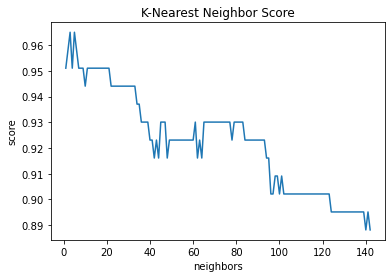

In [12]:
plt.plot(range(1,len(X_test)),scores)
plt.xlabel("neighbors")
plt.ylabel("score")
plt.title("K-Nearest Neighbor Score")

It seems that one neighbor is the optimal number of neighbors to test, with accuracy quickly dropping off after ~30 neighbors. This is likely due to the fact that we are encompassing too much of our dataset. Let's just run it with one classifier that is in our high-accuracy range.

In [13]:
kpipe=Pipeline(steps=[  #creates model
            ("model",sk.neighbors.KNeighborsClassifier(5)) #one neighbor
    ])
kpipe.fit(X_train,Y_train) #trains model
score=kpipe.score(X_test,Y_test) #scores model
print(score)

0.965034965034965


 We find that a K-NN approach is more accurrate than the sequential or random forest algorithms. We achieve an approximately 95% accurracy with the NN approach between 1 and 20 neighbors. This indicates that if there is a set of parameters that predicts malignant/beneign tumours for one person, it is very likely to also predict that for another person.